In [28]:
# importing libraries
import pandas as pd
#from pandas.plotting import scatter_matrix
# importing libraries for data visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# Reading the file
hr=pd.read_csv('https://raw.githubusercontent.com/akjadon/Finalprojects_DS/master/Employee-Attrition/data/employee-attrition.csv',sep=',')

In [30]:
# Display the first few rows
hr.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [31]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'department', 'salary', 'left'],
      dtype='object')

In [32]:
hr.shape

(14999, 10)

In [33]:
hr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

There are 3571 employees left (1) and 11428 employees stayed in(0).

In [34]:
hr.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


* The average satisfaction level of employees who stayed with the company is higher than that of the employees who left.
* The average monthly work hours of employees who left the company is more than that of the employees who stayed.
* The employees who had workplace accidents are less likely to leave than that of the employee who did not have workplace accidents.
* The employees who were promoted in the last five years are less likely to leave than those who did not get a promotion in the last five years.

In [35]:
# Descriptive analytics for the fields
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [36]:
hr.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_monthly_hours    14999 non-null int64
time_spend_company       14999 non-null int64
work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
left                     14999 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [37]:
hr['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [38]:
hr['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [39]:
# Check for missing values in all columns
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64

* No missing values in given dataset

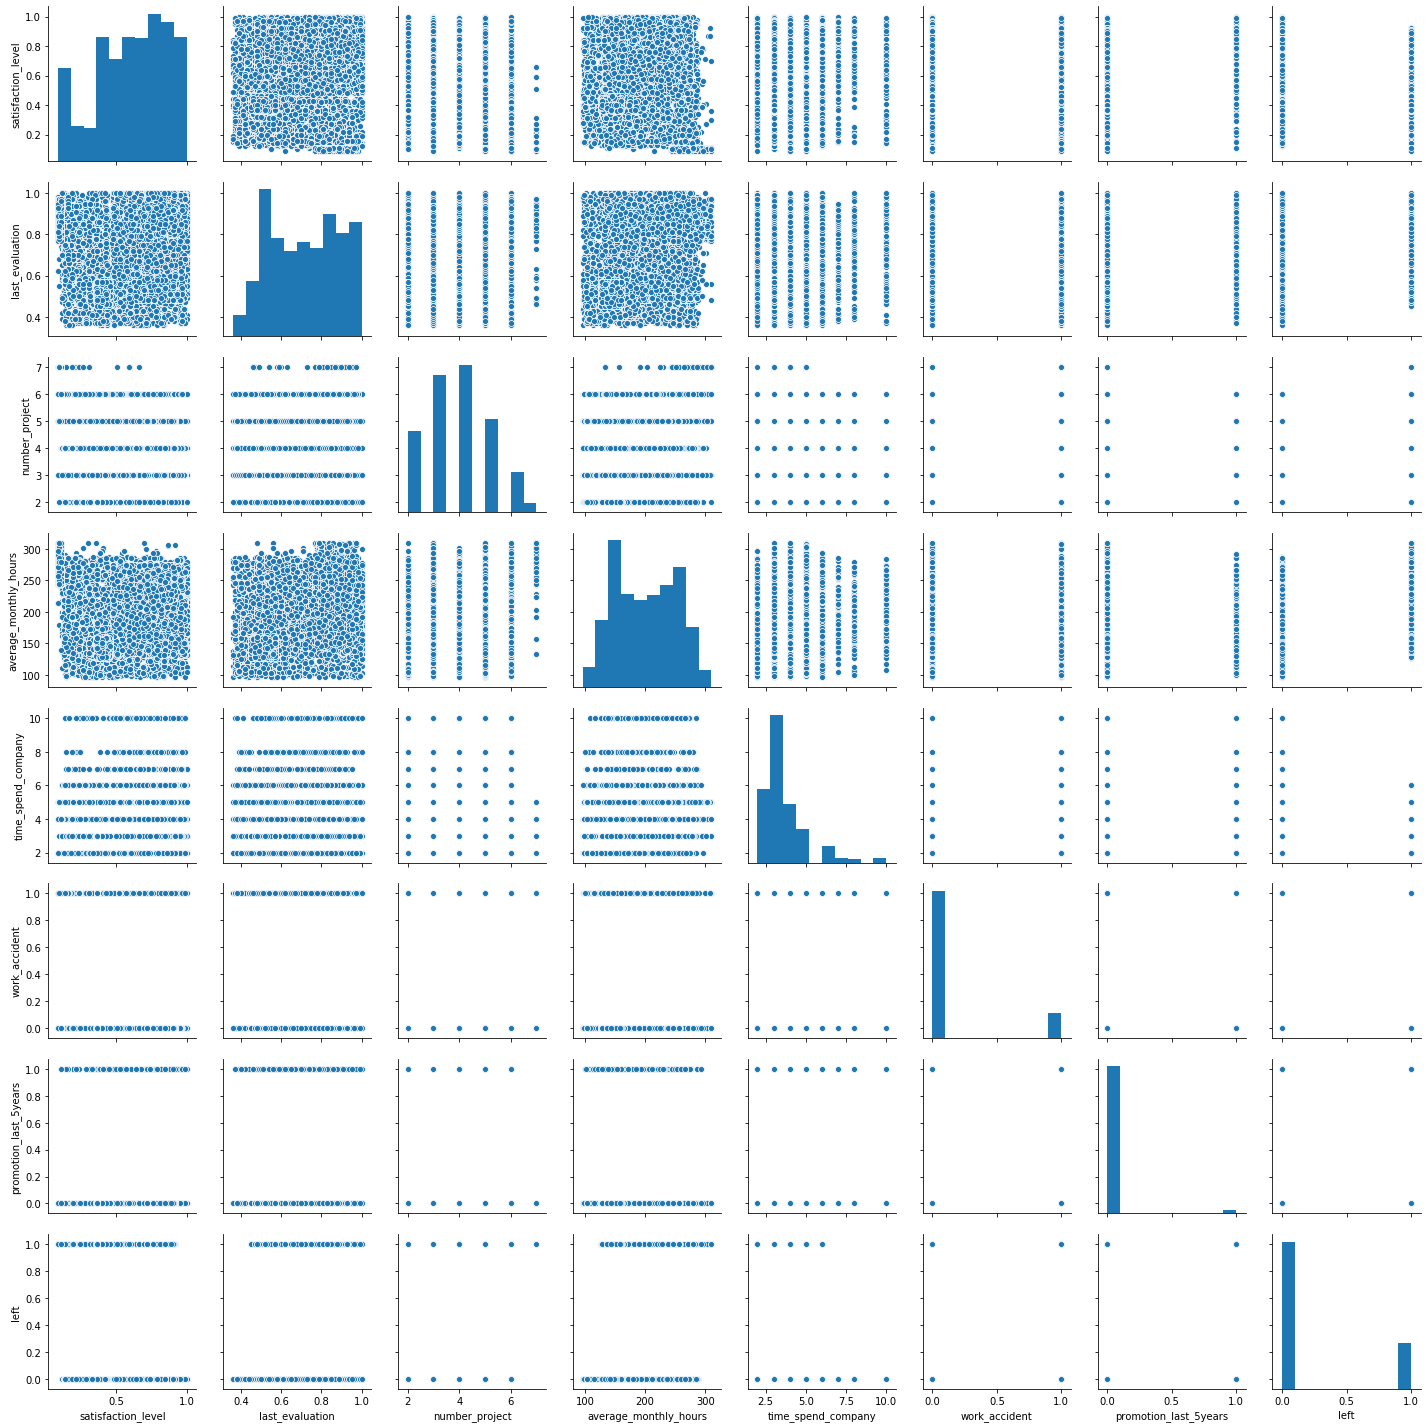

In [41]:
sns.pairplot(hr)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27b24b38>,
      dtype=object)

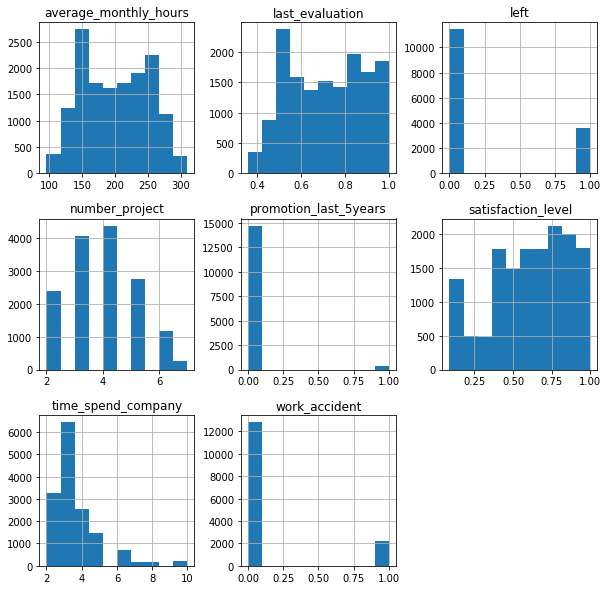

In [42]:
%matplotlib inline
hr.hist(figsize=(10,10))

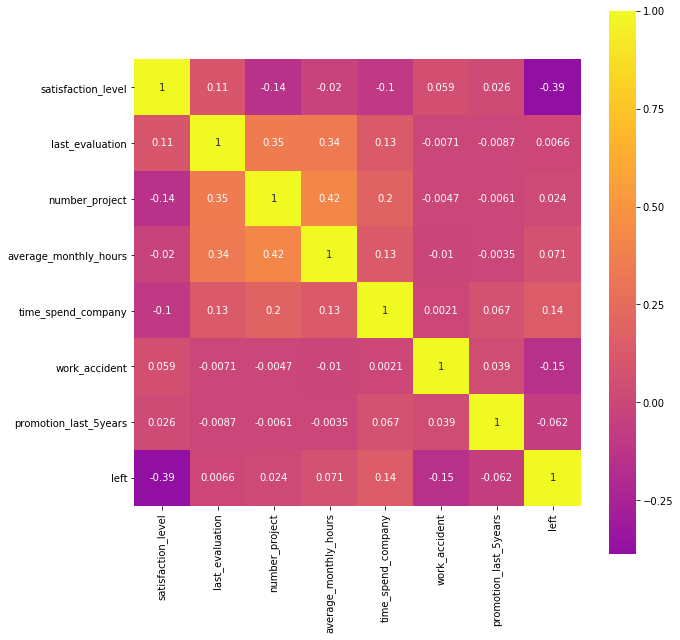

In [44]:
matrix = hr.corr()

f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(matrix, square = True, center = 0, annot = True, cmap="plasma")

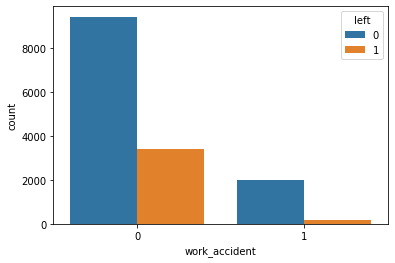

In [45]:
sns.countplot(x='work_accident', hue='left', data = hr)

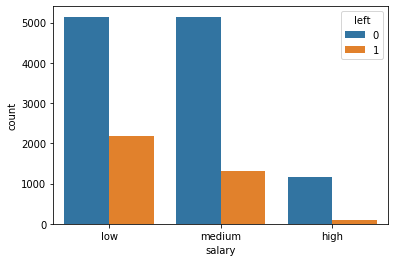

In [46]:
sns.countplot(x='salary', hue='left', data = hr)

The proportion of the employee turnover depends a great deal on their salary level; hence, salary level can be a good predictor in predicting the outcome.

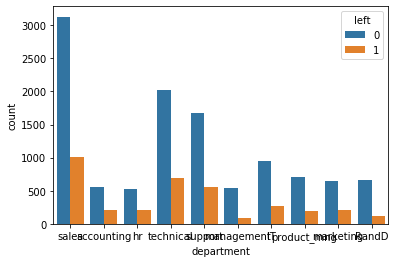

In [47]:
sns.countplot(x='department', hue='left', data = hr)

* It is evident that the frequency of employee turnover depends a great deal on the department they work for. Thus, department can be a good predictor of the outcome variable.

In [ ]:
#hotcoding the categorical vlaues
hotcoded_hr=pd.get_dummies(hr,columns=['department','salary'],drop_first=True)

In [48]:
hotcoded_hr.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,left,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,1,0,0,1,0


In [49]:
hotcoded_hr.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,left,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083,0.052470,0.051137,0.049270,0.042003,0.057204,0.060137,0.276018,0.148610,0.181345,0.487766,0.429762
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924,0.222981,0.220284,0.216438,0.200602,0.232239,0.237749,0.447041,0.355715,0.385317,0.499867,0.495059
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [59]:
# y is the target variable and dependent variable
# X is independent variable
X= hotcoded_hr.drop('left',axis=1)
y= hotcoded_hr.left

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [61]:
train_model=DecisionTreeClassifier()

In [62]:
train_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [68]:
y_predict= train_model.predict(X_test)

In [69]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [70]:
print('Classfication Report - \n',classification_report(y_test,y_predict))
print('\n')
print('confusion_matrix  - \n',confusion_matrix(y_test,y_predict))

Classfication Report - 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      3462
           1       0.94      0.97      0.95      1038

    accuracy                           0.98      4500
   macro avg       0.96      0.98      0.97      4500
weighted avg       0.98      0.98      0.98      4500



confusion_matrix  - 
 [[3392   70]
 [  30 1008]]


In [66]:
from sklearn import metrics

In [71]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_predict))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_predict))

Accuracy: 0.9777777777777777
Precision: 0.935064935064935
Recall: 0.9710982658959537


In [75]:
# Cross Validation
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = DecisionTreeClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.977


In [ ]:
# The average accuracy remains very close to the Desicion tree classifier accuracy; hence, we can conclude that the model generalizes well.

In [78]:
feature =(dict(zip(hr.columns, train_model.feature_importances_)))

In [80]:
for key, value in sorted(feature.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

promotion_last_5years: 3.147332260854688e-05
department: 0.0005865337872932558
salary: 0.0006930222023455107
left: 0.0012646560977017712
work_accident: 0.0027177816445684154
average_monthly_hours: 0.09824782353330867
number_project: 0.09880001339722133
time_spend_company: 0.13018710420363058
last_evaluation: 0.15187840489118729
satisfaction_level: 0.5004434080310498


The top 3 factors associated with attrition of employee in an organization for the given data set are
*Satisfaction level
*Last evaluation
*Time Spent with company
